## 

Build baseline using linear regression 

In [1]:
import pickle, matplotlib.pyplot as plt, numpy as np 

D = pickle.load(open('save_crino_supplyhour_data.p', 'rb')) 


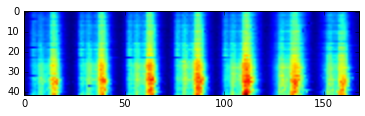

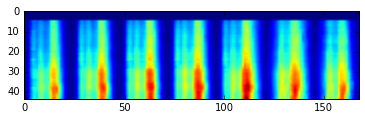

In [2]:
# establish 4 week average baseline 

M = np.zeros([D.shape[0] + 2, D.shape[1]]) 

k = 0.25 * np.asarray([1.0, 1.0, 1.0, 1.0]) 

for i in range(D.shape[1]): 
    d = D[:, i] 
    c = np.convolve(d, k, 'valid') 
    M[5:, i] = c 

plt.figure() 
plt.imshow(D.astype(np.float32)) 
plt.figure() 
plt.imshow(M.astype(np.float32)) 
plt.show() 


In [3]:
import pandas as pd 
from statsmodels.regression.mixed_linear_model import MixedLM 

D = np.reshape(D, [D.size, ]) 

d = {'week_index' : [ int(np.floor(i / 7)) for i in range(D.size)], 
     'supply_hours' : D, 
     'block_dow' : [i % 7 for i in range(D.size)]} 
DF = pd.DataFrame(data = d) 


      week_index supply_hours  block_dow
0              0      1.31167          0
1              0      73.6461          1
2              0      158.376          2
3              0      317.444          3
4              0      462.534          4
5              0      490.906          5
6              0      442.854          6
7              1      480.837          0
8              1      528.434          1
9              1      462.258          2
10             1      406.198          3
11             1      431.716          4
12             1      517.448          5
13             1      846.333          6
14             2      960.526          0
15             2      885.255          1
16             2      705.616          2
17             2      502.666          3
18             2      340.756          4
19             2       214.24          5
20             2      122.835          6
21             3      75.3858          0
22             3      20.4547          1
23             3

In [21]:
for pred_wk in range(10, 15): #int(D.shape[0] / 7)): 
    df = DF.loc[DF['week_index'] < pred_wk] 
    rdf = df.copy() 
    rdf['delta_weeks'] = rdf['week_index'] - pred_wk 
    #print(rdf)
    md = MixedLM.from_formula("supply_hours ~ 1 + delta_weeks",
                              groups='block_dow',
                              re_formula='1 + delta_weeks',
                              data=rdf.fillna({'supply_hours': 0.}) 
                             )
    
    mdf = md.fit()
    index = mdf.random_effects.keys()
    print(index)
    print(mdf.params)
    print(mdf.random_effects[0])
    print(mdf.random_effects[1])
    print(mdf.random_effects[2])
    print(mdf.random_effects[3])
    print(mdf.random_effects[4])
    print(mdf.random_effects[5])
    print(mdf.random_effects[6])
    
    data = { 
        'supply_hours': (mdf.params['Intercept'] + [mdf.random_effects[i]['block_dow'] for i in index]), 
        'block_dow' : index 
        } 
    result = pd.DataFrame(data).set_index('block_dow') 
    print(result) 
    print(DF.loc[DF['week_index'] == pred_wk]) 

/home/udocker/phoenix-worker/environments/python3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/udocker/phoenix-worker/environments/python3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/udocker/phoenix-worker/environments/python3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/udocker/phoenix-worker/environments/python3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/udocker/phoenix-worker/env

dict_keys([0, 1, 2, 3, 4, 5, 6])
Intercept                      562.030042
delta_weeks                     20.218958
block_dow Var                    0.038785
block_dow x delta_weeks Cov      0.005408
delta_weeks Var                  0.000762
dtype: float64
block_dow      12.360902
delta_weeks     1.727440
dtype: float64
block_dow      3.409854
delta_weeks    0.480969
dtype: float64
block_dow      1.551401
delta_weeks    0.223375
dtype: float64
block_dow      1.574090
delta_weeks    0.220047
dtype: float64
block_dow     -4.787441
delta_weeks   -0.668527
dtype: float64
block_dow     -5.287760
delta_weeks   -0.737504
dtype: float64
block_dow     -8.821045
delta_weeks   -1.245800
dtype: float64
                       supply_hours
block_dow                          
(0, 1, 2, 3, 4, 5, 6)    574.390944
(0, 1, 2, 3, 4, 5, 6)    565.439896
(0, 1, 2, 3, 4, 5, 6)    563.581443
(0, 1, 2, 3, 4, 5, 6)    563.604132
(0, 1, 2, 3, 4, 5, 6)    557.242601
(0, 1, 2, 3, 4, 5, 6)    556.742282
(0, 1, 2, 3

/home/udocker/phoenix-worker/environments/python3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/udocker/phoenix-worker/environments/python3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/udocker/phoenix-worker/environments/python3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/udocker/phoenix-worker/environments/python3/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2026: ConvergenceWarning: Gradient optimization failed.
  warnings.warn(msg, ConvergenceWarning)
/home/udocker/phoenix-worker/environments/python3/lib/

dict_keys([0, 1, 2, 3, 4, 5, 6])
Intercept                      442.973934
delta_weeks                      2.809575
block_dow Var                    1.000000
block_dow x delta_weeks Cov      0.000000
delta_weeks Var                  1.000000
dtype: float64
block_dow      57.251376
delta_weeks     8.114694
dtype: float64
block_dow     -13.434911
delta_weeks    -0.063057
dtype: float64
block_dow     -22.728620
delta_weeks    -0.755777
dtype: float64
block_dow     -13.803136
delta_weeks    -1.530137
dtype: float64
block_dow     -40.325231
delta_weeks    -5.215935
dtype: float64
block_dow      7.986048
delta_weeks    0.926091
dtype: float64
block_dow      25.054475
delta_weeks    -1.475879
dtype: float64
                       supply_hours
block_dow                          
(0, 1, 2, 3, 4, 5, 6)    500.225310
(0, 1, 2, 3, 4, 5, 6)    429.539023
(0, 1, 2, 3, 4, 5, 6)    420.245314
(0, 1, 2, 3, 4, 5, 6)    429.170799
(0, 1, 2, 3, 4, 5, 6)    402.648703
(0, 1, 2, 3, 4, 5, 6)    450.959982
(

/home/udocker/phoenix-worker/environments/python3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/udocker/phoenix-worker/environments/python3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/udocker/phoenix-worker/environments/python3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/udocker/phoenix-worker/environments/python3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/udocker/phoenix-worker/env

dict_keys([0, 1, 2, 3, 4, 5, 6])
Intercept                      483.542462
delta_weeks                      7.166377
block_dow Var                    1.000000
block_dow x delta_weeks Cov      0.000000
delta_weeks Var                  1.000000
dtype: float64
block_dow      47.455337
delta_weeks     5.968859
dtype: float64
block_dow     -24.300792
delta_weeks    -1.264951
dtype: float64
block_dow     -14.160231
delta_weeks     0.342923
dtype: float64
block_dow      4.005580
delta_weeks    0.690384
dtype: float64
block_dow     -25.777276
delta_weeks    -2.894479
dtype: float64
block_dow     -3.008500
delta_weeks   -0.441717
dtype: float64
block_dow      15.785882
delta_weeks    -2.401019
dtype: float64
                       supply_hours
block_dow                          
(0, 1, 2, 3, 4, 5, 6)    530.997799
(0, 1, 2, 3, 4, 5, 6)    459.241670
(0, 1, 2, 3, 4, 5, 6)    469.382231
(0, 1, 2, 3, 4, 5, 6)    487.548042
(0, 1, 2, 3, 4, 5, 6)    457.765186
(0, 1, 2, 3, 4, 5, 6)    480.533963
(0,

/home/udocker/phoenix-worker/environments/python3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/udocker/phoenix-worker/environments/python3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/udocker/phoenix-worker/environments/python3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/udocker/phoenix-worker/environments/python3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/udocker/phoenix-worker/env

dict_keys([0, 1, 2, 3, 4, 5, 6])
Intercept                      594.349644
delta_weeks                     18.270749
block_dow Var                    1.000000
block_dow x delta_weeks Cov      0.000000
delta_weeks Var                  1.000000
dtype: float64
block_dow     -9.575036
delta_weeks   -0.758665
dtype: float64
block_dow     -0.241394
delta_weeks    1.444981
dtype: float64
block_dow      47.374552
delta_weeks     6.825215
dtype: float64
block_dow      49.373449
delta_weeks     5.402964
dtype: float64
block_dow     -10.729608
delta_weeks    -0.960025
dtype: float64
block_dow     -24.165671
delta_weeks    -2.625036
dtype: float64
block_dow     -52.036292
delta_weeks    -9.329433
dtype: float64
                       supply_hours
block_dow                          
(0, 1, 2, 3, 4, 5, 6)    584.774609
(0, 1, 2, 3, 4, 5, 6)    594.108250
(0, 1, 2, 3, 4, 5, 6)    641.724196
(0, 1, 2, 3, 4, 5, 6)    643.723094
(0, 1, 2, 3, 4, 5, 6)    583.620036
(0, 1, 2, 3, 4, 5, 6)    570.183973
(0,

/home/udocker/phoenix-worker/environments/python3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/udocker/phoenix-worker/environments/python3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/udocker/phoenix-worker/environments/python3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


dict_keys([0, 1, 2, 3, 4, 5, 6])
Intercept                      484.800427
delta_weeks                      5.488752
block_dow Var                    1.000000
block_dow x delta_weeks Cov      0.000000
delta_weeks Var                  1.000000
dtype: float64
block_dow      42.917949
delta_weeks     4.513543
dtype: float64
block_dow      19.641253
delta_weeks     3.265164
dtype: float64
block_dow      44.628062
delta_weeks     5.820107
dtype: float64
block_dow      28.752784
delta_weeks     2.771895
dtype: float64
block_dow     -32.298147
delta_weeks    -2.983161
dtype: float64
block_dow     -44.766799
delta_weeks    -4.371532
dtype: float64
block_dow     -58.875102
delta_weeks    -9.016017
dtype: float64
                       supply_hours
block_dow                          
(0, 1, 2, 3, 4, 5, 6)    527.718376
(0, 1, 2, 3, 4, 5, 6)    504.441680
(0, 1, 2, 3, 4, 5, 6)    529.428489
(0, 1, 2, 3, 4, 5, 6)    513.553211
(0, 1, 2, 3, 4, 5, 6)    452.502279
(0, 1, 2, 3, 4, 5, 6)    440.033628

/home/udocker/phoenix-worker/environments/python3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/udocker/phoenix-worker/environments/python3/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2026: ConvergenceWarning: Gradient optimization failed.
  warnings.warn(msg, ConvergenceWarning)
/home/udocker/phoenix-worker/environments/python3/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [ ]:
"""Predict a metric using a mixed effects linear model.

Currently just the historical average.

Parameters 
---------- 
se_df : pandas.DataFrame 
    supply efficiency model training data 
metric : str 
    column name of the metric to forecast 
recommendation_week : str 
    %Y-%m-%d for the Monday of the week to forecast for 
min_value : float 
    minimum value guardrail 
kwargs : dict 
    keyword arguments 

Returns
-------
dataframe of predictions

"""
"""
def predict_metric(se_df, metric, recommendation_week, min_value=0., **kwargs):
    try:
        from statsmodels.regression.mixed_linear_model import MixedLM

        raw_df = se_df.copy()

        raw_df['delta_weeks'] = (pd.to_datetime(raw_df['week_of']) - pd.to_datetime(recommendation_week)).dt.days / 7

        def fit_func(group):
            try:
                md = MixedLM.from_formula("{} ~ 1 + delta_weeks".format(metric),
                                          groups='block_dow',
                                          re_formula='1 + delta_weeks',
                                          data=group.fillna({metric: 0.})
                                          )

                mdf = md.fit()

                index = mdf.random_effects.keys()
                data = {
                    metric: (mdf.params['Intercept'] + [mdf.random_effects[i]['Intercept'] for i in index]),
                    'block_dow': index,
                }
                return pd.DataFrame(data).set_index('block_dow')

            except np.linalg.linalg.LinAlgError as err:
                logging.warning(err)
                return group.groupby('block_dow')[metric].mean().reset_index()

        prediction_df = raw_df.groupby(['block_hod', 'zone']).apply(fit_func).reset_index()
    except ValueError:
        warnings.warn("when trying to forecast {}, mixed effects didn't work, using historical mean".format(metric))
        prediction_df = raw_df.groupby(['block_hod', 'zone', 'block_dow'])[metric].mean().reset_index()

    check_df_shape_validity(prediction_df, '{} prediction df'.format(metric))

    if prediction_df[metric].min() < min_value:
        prediction_df[metric] = np.maximum(prediction_df[metric], min_value)
        warnings.warn("{0} prediction generated value less than {1}".format(metric, min_value))
    return prediction_df
""" 
